In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [104]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [105]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [106]:
df.shape

(13320, 9)

In [107]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [108]:
df.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [109]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [110]:
df['balcony'].mode().item()

2.0

In [111]:
df['balcony'].fillna(value =df['balcony'].mode().item() ,inplace=True)

In [112]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony            0
price              0
dtype: int64

In [114]:
df = df.drop(['area_type','society','availability'], axis=1)
df.shape

(13320, 6)

In [115]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [116]:
df = df.dropna()

In [117]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [118]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [119]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [120]:
df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [121]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [123]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [124]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [132]:
df3 = df.copy()
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price
30,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
122,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,0.0,43.490
188,KR Puram,2,1015 - 1540,2.0,0.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,0.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,0.0,63.770
648,Arekere,9,4125Perch,9.0,2.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,0.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,0.0,445.000


In [133]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [134]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)

In [135]:
df4.total_sqft.isnull().sum()

46

In [136]:
df4['total_sqft'].dropna(inplace=True)

In [137]:
df4.total_sqft.isnull().sum()

0

In [138]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [190]:
#Add new feature called price per square feet
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [191]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [192]:
len(df.location.unique())

1304

In [193]:
locs = df.location.value_counts(ascending=True)

In [194]:
locs.head()

Sadhguru Layout                         1
Asthagrama Layout                       1
ravindra nagar, T.dasarahalli peenya    1
B Y Raveshwara Nagar                    1
Hanumagiri                              1
Name: location, dtype: int64

In [195]:
locs.tail()

Thanisandra        233
Kanakpura Road     266
Electronic City    302
Sarjapur  Road     392
Whitefield         534
Name: location, dtype: int64

In [196]:
locs[2]

1

In [197]:
locs[998]

8

In [198]:
location_stats_less_than_10 = locs[locs<=10]
location_stats_less_than_10

Sadhguru Layout                          1
Asthagrama Layout                        1
ravindra nagar, T.dasarahalli peenya     1
B Y Raveshwara Nagar                     1
Hanumagiri                               1
                                        ..
Nagappa Reddy Layout                    10
Basapura                                10
Naganathapura                           10
Nagadevanahalli                         10
Sadashiva Nagar                         10
Name: location, Length: 1063, dtype: int64

In [199]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [200]:
df5.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [209]:
df5[(df5['total_sqft']/df5['size'])<300].head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
9,other,6,1020.0,6.0,2.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,2.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,1.0,150.0,10660.980810
68,other,8,1350.0,7.0,0.0,85.0,6296.296296
70,other,3,500.0,3.0,2.0,100.0,20000.000000


In [211]:
df5.shape

(13246, 7)

In [212]:
df6 = df5[~((df5['total_sqft']/df5['size']) < 300)]
df6.shape

(12502, 7)

In [213]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10244, 7)

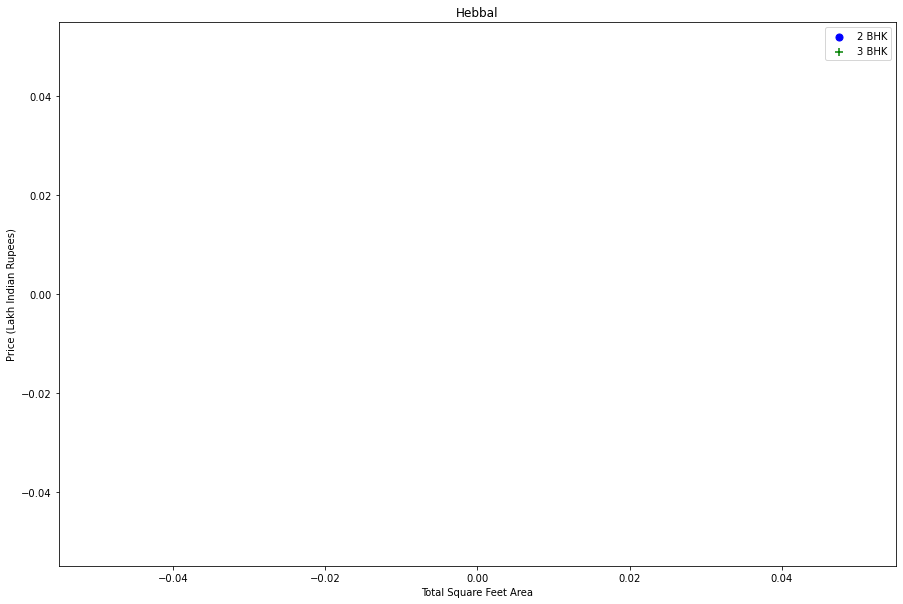

In [221]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.size==2)]
    bhk3 = df[(df.location==location) & (df.size==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")

In [222]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7342, 7)

In [223]:
df9 = df8[df8.bath<df8.size+2]
df9.shape

(7342, 7)

In [225]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(3)

,location,size,total_sqft,bath,balcony,price
1,Devarachikkanahalli,2,1250.0,2.0,2.0,40.0
2,Devarachikkanahalli,2,1200.0,2.0,2.0,83.0
3,Devarachikkanahalli,2,1170.0,2.0,2.0,40.0


In [232]:
df10.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

In [233]:
df10.columns = ['location', 'bhk', 'total_sqft', 'bath', 'balcony', 'price']

In [234]:
df10.head(1)

,location,bhk,total_sqft,bath,balcony,price
1,Devarachikkanahalli,2,1250.0,2.0,2.0,40.0


In [235]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
df11 = pd.concat([df10, dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,bhk,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2,1250.0,2.0,2.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2,1200.0,2.0,2.0,83.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2,1170.0,2.0,2.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2,947.0,2.0,2.0,43.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
df12 = df11.drop('location',axis='columns')
df12.head(1)

,bhk,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
df12.shape

(7342, 246)

In [250]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,bhk,total_sqft,bath,balcony,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
y = df12['price']

In [252]:
y.tail()

10235     70.0
10236    200.0
10239    110.0
10240     26.0
10243    400.0
Name: price, dtype: float64

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [258]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8057721380031745

In [259]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80440874, 0.82598482, 0.84370476, 0.84697046, 0.80723456])

In [260]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [261]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.825661,{'normalize': True}
1,lasso,0.683878,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.663153,"{'criterion': 'mse', 'splitter': 'best'}"


In [267]:
def predict_price(bhk,total_sqft,bath,balcony,location):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = total_sqft
    x[2] = bath
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [268]:
X.columns

Index(['bhk', 'total_sqft', 'bath', 'balcony', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [266]:
#bhk,total_sqft,bath,balcony,location

In [269]:
predict_price(2,1000,2,1,'Indira Nagar') 

166.21490562381044

In [270]:
import pickle

with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf, f)

In [271]:
import json


columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))